In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

import numpy as np
import matplotlib as mpl

from brian2 import *

code_path = '../code'
sys.path.append(code_path)

from model import HH_model
import config


import logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logger = logging.getLogger()

In [3]:
seed = 20221107

In [4]:
# text
plt.rcParams['text.usetex'] = True
plt.rcParams['pdf.fonttype'] = 42

# plotting
plt.rcParams['lines.linewidth'] = 0.75

In [5]:
# cortical parameters
model_type = 'HH_model'
model_name = 'cortex'

# model parameters (type dict)
model_params = config.model_dynamics[model_type][model_name]['parameters'].copy()

# equations (type str)
eqs = config.model_dynamics[model_type][model_name]['eqs']

# simulation parameters (type dict)
simulation_params = config.simulation['brian2'].copy()

# number of neurons/trials
simulation_params['N'] = 10000

# refractory (not integrating input)
simulation_params['refractory'] = 'm > .5'

# mean input
I0 = 0.082  # -> mean output 10 Hz
# input amplitude
I1 = 0.01
# noise std
s = 0.02

model_params['I0'] = '{}*nA'.format(I0)
model_params['I1'] = '{}*nA'.format(I1)
model_params['s'] = '{}*nA'.format(s)

# define and initalize model
m_cortex = HH_model(
    model_parameters=model_params,
    simulation_parameters=simulation_params,
    eqs=eqs,
    seed=seed
)

# add monitor to observe variables
m_cortex.add_monitor(['I', 'v', 'm', 'h', 'n'], spikes=True)

# run
m_cortex.run()

INFO:model:Adjust timedArray in parameter 'r0' to compensate t_init=1.0 seconds


In [6]:
gridspec_kw = {'left': 0.3, 'bottom': 0.2, 'right': 0.975, 'top': 0.975}

figsize=(6.3/3, 2)

alpha_v = alpha_I = 0.7

lw = .75
fontsize = 7
label_fontsize = 8
type_fr = 'bar'
cmap = mpl.colormaps['tab10']

plot_kw_1 = plot_kw_hat = {'lw': lw}
plot_kw_2={'color':'w', 'edgecolor':'k', 'alpha':.75, 'linewidth': .5}
plot_kw_line_between = {'lw': lw}

plot_kw_hat = {'c': 'k'}

props = dict(boxstyle='round', facecolor='w', ec='w', pad=.1, alpha=0)
I_ex_plot_kw = {'c': 'k', 'alpha': .3, 'lw': lw}

INFO:viz:s1:
	a_0=0.08
	a_1=0.01
	\phi=-0.00
s1:
	a_0=0.08
	a_1=0.01
	\phi=-0.00
INFO:viz:s2:
	a_0=9.94
	a_1=9.65
	\phi=0.26
INFO:viz:phase shift = -0.0041


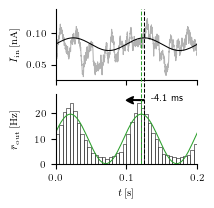

In [7]:
plot_kw_hat_2 = {'c': plt.colormaps['tab10'](2)}

arrow_y = 25
arrow_y_offset = None  # 5
arrow_text_y_offset = None  # 0.025
arrow_text_x = 'right'
arrow_text_x_offset = .01
arrow_min_dx=0.025

arrow_text = '<sign*shift> <unit>'
arrow_text_kw = {'size': fontsize, 'ha': 'left'}

fig, axs = plt.subplots(2, 1, figsize=figsize, gridspec_kw=gridspec_kw)


plot_kw_line_between_2 = plot_kw_line_between.copy()
plot_kw_line_between_2['c'] = plot_kw_hat_2['c']
m_cortex.plot_variable('I', i=0, ax=axs[0], plot_kw=I_ex_plot_kw)
m_cortex.plot_phase_shift('I', 'psth', phase_shift_kw={'f_0': 10}, fixed_f=True, verbose=True, hist_kw={'bins':100}, i_max=1, fig=fig, ax1=axs[0], ax2=axs[1],
                      type_1=None, type_2=type_fr, plot_kw_1=plot_kw_1, plot_kw_2=plot_kw_2, plot_kw_hat=plot_kw_hat, plot_kw_hat_2=plot_kw_hat_2, plot_kw_line_between=plot_kw_line_between,
                      arrow_y=arrow_y, arrow_y_offset=arrow_y_offset, arrow_text_y_offset=arrow_text_y_offset, arrow_text_x=arrow_text_x, arrow_min_dx=arrow_min_dx, plot_kw_line_between_2=plot_kw_line_between_2,
                      arrow_text_x_offset=arrow_text_x_offset, arrow_text=arrow_text, fontsize=fontsize, arrow_text_kw=arrow_text_kw, arrow_ax='bottom', arrow_from='top')

axs[0].set_xlabel(None)
for ax in axs:
    ax.set_xlim([0, 0.2])
    ax.set_xticks([0, 0.1, 0.2])
    
fig.align_ylabels(axs)

save_name = 'cortex_10Hz'
# plt.savefig(save_name + '.svg', pad_inches=0., transparent=True)
# plt.savefig(save_name + '.pdf', pad_inches=0., dpi=300, facecolor='w')

In [8]:
# hippicampal parameters
model_type = 'HH_model'
model_name = 'hippocampus'

model_params = config.model_dynamics[model_type][model_name]['parameters'].copy()
eqs = config.model_dynamics[model_type][model_name]['eqs']
simulation_params = config.simulation['brian2'].copy()

simulation_params['N'] = 10000
# simulation_params['threshold'] = 'm>0.5'
# simulation_params['t_init'] = '1*second'
simulation_params['refractory'] = 'm > .5'

I1 = 0.01
s = 0.02
I0 = -0.014


# -> -0.014 model_params['I0'] = 'rate_based'
model_params['I0'] = '{}*nA'.format(I0)
model_params['I1'] = '{}*nA'.format(I1)
model_params['s'] = '{}*nA'.format(s)

m_hippo = HH_model(model_parameters=model_params, simulation_parameters=simulation_params, eqs=eqs, seed=seed)
# m_hippo.add_monitor(['I', 'v', 'm', 'n', 'h', 'alpha_h', 'beta_h', 'alpha_n', 'beta_n',], spikes=True)
m_hippo.add_monitor(['I', 'v', 'm', 'h', 'n'], spikes=True)
m_hippo.run()

INFO:model:Adjust timedArray in parameter 'r0' to compensate t_init=1.0 seconds


INFO:viz:s1:
	a_0=-0.01
	a_1=0.01
	\phi=-0.00
s1:
	a_0=-0.01
	a_1=0.01
	\phi=-0.00
INFO:viz:s2:
	a_0=9.82
	a_1=7.28
	\phi=-0.38
INFO:viz:phase shift = 0.0061


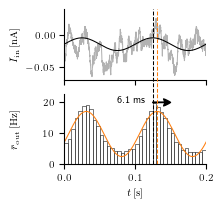

In [9]:
plot_kw_hat_2 = {'c': plt.colormaps['tab10'](1)}

arrow_y = 20
arrow_y_offset = None  # 5
arrow_text_y_offset = None  # 0.025
arrow_text_x = 'left'
arrow_text_x_offset = -.01
arrow_min_dx=0.025

plot_kw_line_between_2 = plot_kw_line_between.copy()
plot_kw_line_between_2['c'] = plot_kw_hat_2['c']

arrow_text = '<sign*shift> <unit>'
arrow_text_kw = {'size': fontsize, 'ha': 'right'}
fig, axs = plt.subplots(2, 1, figsize=figsize, gridspec_kw=gridspec_kw)
m_hippo.plot_variable('I', i=0, ax=axs[0], plot_kw=I_ex_plot_kw)
m_hippo.plot_phase_shift('I', 'psth', phase_shift_kw={'f_0': 10}, fixed_f=True, verbose=True, hist_kw={'bins':100}, i_max=1, fig=fig, ax1=axs[0], ax2=axs[1],
                      type_1=None, type_2=type_fr, plot_kw_1=plot_kw_1, plot_kw_2=plot_kw_2, plot_kw_hat=plot_kw_hat, plot_kw_hat_2=plot_kw_hat_2, plot_kw_line_between=plot_kw_line_between,
                      arrow_y=arrow_y, arrow_y_offset=arrow_y_offset, arrow_text_y_offset=arrow_text_y_offset, arrow_text_x=arrow_text_x, arrow_min_dx=arrow_min_dx, plot_kw_line_between_2=plot_kw_line_between_2,
                      arrow_text_x_offset=arrow_text_x_offset, arrow_text=arrow_text, fontsize=fontsize, arrow_text_kw=arrow_text_kw, arrow_ax='bottom', arrow_from='top')

axs[0].set_xlabel(None)
for ax in axs:
    ax.set_xlim([0, 0.2])
    ax.set_xticks([0, 0.1, 0.2])
fig.align_ylabels(axs)


save_name = 'hippocampus_10Hz'
# plt.savefig(save_name + '.svg', pad_inches=0., transparent=True)
# plt.savefig(save_name + '.pdf', pad_inches=0., dpi=300, facecolor='w')

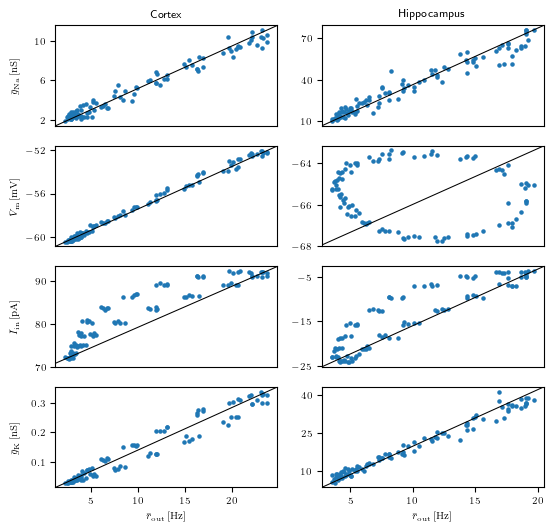

In [10]:
# import string
fontsize = 7

variables = ['g_na', 'v', 'I', 'g_kd']
fig, axs = plt.subplots(len(variables), 2, figsize=(6.3, len(variables) * 1.5))
plot_kw = {'s': 5}

zscore2 = False

for i_v, v in enumerate(variables):
    
    if v == 'I':
        unit = 'pA'
    else:
        unit = None
        
    ax = axs[i_v, 0]
    m_cortex.plot_vs('psth', v, every=1, ax=ax, unit2=unit, zscore2=zscore2, plot_kw=plot_kw, fontsize=fontsize)
    
    ax = axs[i_v, 1]
    m_hippo.plot_vs('psth', v, every=1, ax=ax, unit2=unit, zscore2=zscore2, plot_kw=plot_kw, fontsize=fontsize)
    
for ax in axs.reshape(-1):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.plot(xlim, ylim, c='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.tick_params(labelsize=fontsize)

for ax in axs[:, 1]:
    ax.set_ylabel(None)
    

for ax in axs[:-1, :].reshape(-1):
    ax.set_xlabel(None)
    ax.set_xticks([])

    
yticks = [
    [[2, 6, 10], [10, 40, 70]],
    [[-60, -56, -52], [-68, -66, -64]],
    [[70, 80, 90], [-25, -15, -5]],
    [[0.1, 0.2, 0.3], [10, 25, 40]]
]

for row in range(len(variables)):
    for col in range(2):
        yt = yticks[row][col]
        if yt is not None:
            axs[row, col].set_yticks(yt)
            
axs[0, 0].set_title('Cortex', size=8)
axs[0, 1].set_title('Hippocampus', size=8)

fig.align_ylabels(axs[:, 0])

# for i_ax, ax in enumerate(axs.reshape(-1)):
#     p_ = r'${\textbf ' + string.ascii_lowercase[i_ax] + '}$'
#     ax.text(.025, .925, p_, fontsize=8, transform=ax.transAxes, va='top', ha='left', weight='bold')
save_str = 'Fig-Ax_r_out_dependency'
            
            
# plt.savefig(save_str + '.svg', pad_inches=0., transparent=True)
# plt.savefig(save_str + '.pdf', pad_inches=0., dpi=300, facecolor='w')